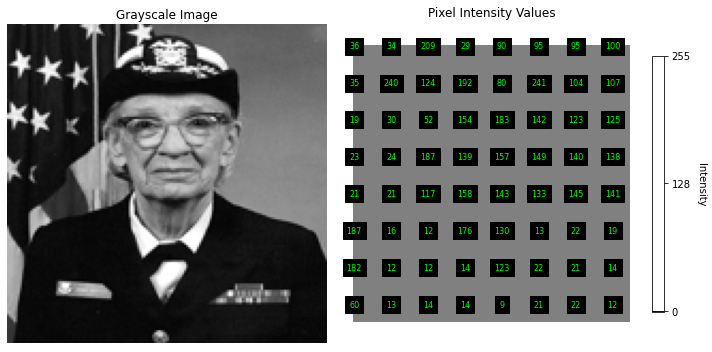

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cbook import get_sample_data
from PIL import Image

# Load and process the sample image
image_path = get_sample_data('grace_hopper.jpg')  
image = Image.open(image_path).convert('L')  # Convert to grayscale if not already
image = image.resize((150, 150))  # Resize for better readability
image_array = np.array(image)

# Set up the plot with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Left subplot: Display the grayscale image in high quality
ax1.imshow(image_array, cmap='gray')
ax1.set_title("Grayscale Image", fontsize=12, color='black')
ax1.axis('off')

# Right subplot: Display pixel intensity values on a black background
black_bg = np.zeros_like(image_array)  # Create a black background
im2 = ax2.imshow(black_bg, cmap='gray')
cbar = plt.colorbar(im2, ax=ax2, fraction=0.04, pad=0.04)  # Add color bar with smaller width
cbar.set_ticks([0, 128, 255])  # Simplify color bar for grayscale intensities
cbar.set_label('Intensity', rotation=270, labelpad=15)

# Set title in black color
ax2.set_title("Pixel Intensity Values", fontsize=12, color='black')
ax2.axis('equal')
ax2.axis('off')

# Display pixel intensity values with increased spacing
step = 20  # Adjust this for sparser display of values
font_size = 8

# Use a bright green color for better visibility
bright_green = '#00FF00'

for i in range(0, image_array.shape[0], step):
    for j in range(0, image_array.shape[1], step):
        pixel_value = image_array[i, j]
        ax2.text(j, i, str(pixel_value), color=bright_green, fontsize=font_size,
                 ha='center', va='center', backgroundcolor='black')

plt.tight_layout()
plt.show()


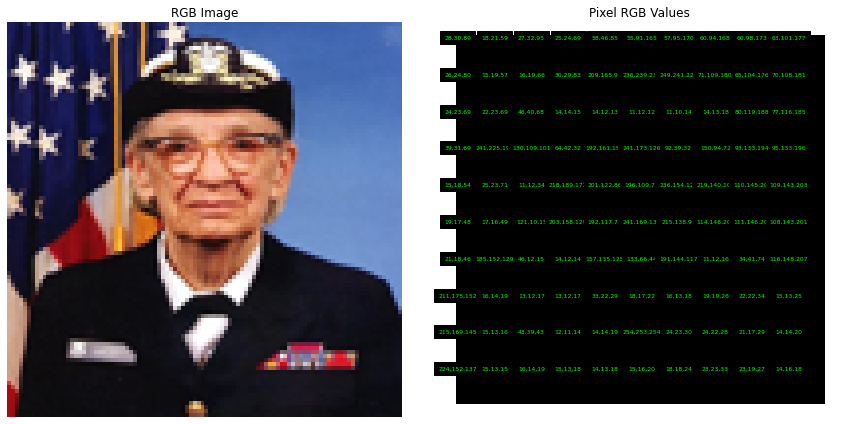

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cbook import get_sample_data
from PIL import Image

# Load and process the sample RGB image
image_path = get_sample_data('grace_hopper.jpg')  
image = Image.open(image_path)  # Load image in RGB mode
image = image.resize((100, 100))  # Resize for better readability
image_array = np.array(image)

# Set up the plot with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: Display the RGB image
ax1.imshow(image_array)
ax1.set_title("RGB Image", fontsize=12, color='black')
ax1.axis('off')

# Right subplot: Display pixel intensity values on a black background
black_bg = np.zeros((image_array.shape[0], image_array.shape[1], 3), dtype=np.uint8)  # Create a black background for RGB
ax2.imshow(black_bg)
ax2.set_title("Pixel RGB Values", fontsize=12, color='black')
ax2.axis('equal')
ax2.axis('off')

# Display RGB pixel intensity values with increased spacing
step = 10  # Adjust this for sparser display of values
font_size = 6

# Function to create a color that contrasts with the black background
def contrasting_text_color(r, g, b):
    # Use white text for better contrast on the black background
    return 'white'

for i in range(0, image_array.shape[0], step):
    for j in range(0, image_array.shape[1], step):
        r, g, b = image_array[i, j]
        text_color = contrasting_text_color(r, g, b)
        ax2.text(j, i, f"{r},{g},{b}", color='lime', fontsize=font_size,
                 ha='center', va='center', backgroundcolor='black')

plt.tight_layout()
plt.show()


In [54]:
from meteostat import Hourly
from datetime import datetime
from scipy.stats import entropy
import numpy as np

# Define the start and end dates for the year 2020
start_hour = datetime(2020, 1, 1)
end_hour = datetime(2020, 12, 31)

# Fetch hourly data for Baie St. Paul for the year 2020
data_hour = Hourly(baie_st_paul, start_hour, end_hour)
data_hour_df = data_hour.fetch()

# Extract the 'temp' column as a NumPy array (assuming 'temp' contains the temperature data)
temp_2020 = data_hour_df['temp'].dropna().to_numpy()  # Drop NaN values if any

# Bin the data and get the counts
counts, _ = np.histogram(temp_2020, bins=20, density=True)

# Calculate the entropy from the counts (ignoring zero bins to avoid log(0) issues)
entropy_value = entropy(counts[counts > 0], base=2)  # Using base=2 for entropy in bits

print("Entropy (in bits) of temperature distribution for 2020:", entropy_value)

Entropy (in bits) of temperature distribution for 2020: 3.9280823266706246


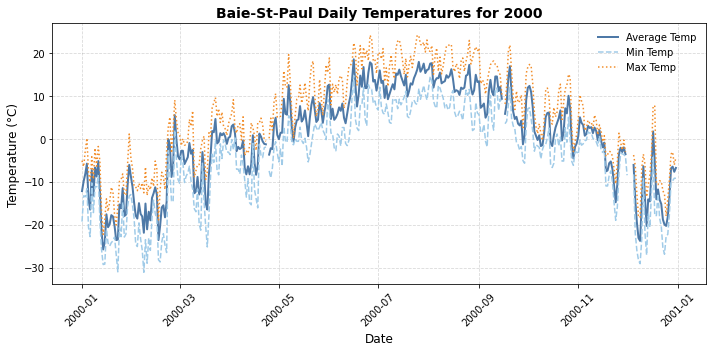

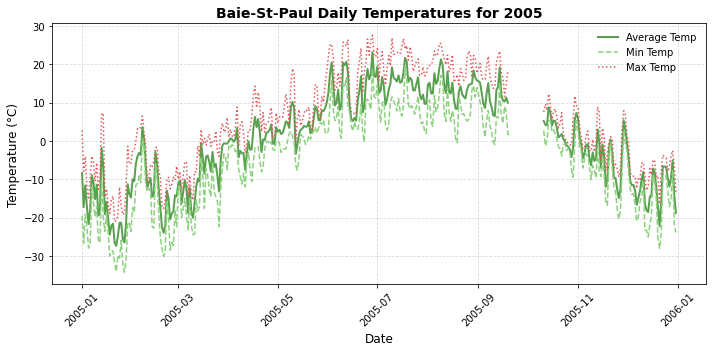

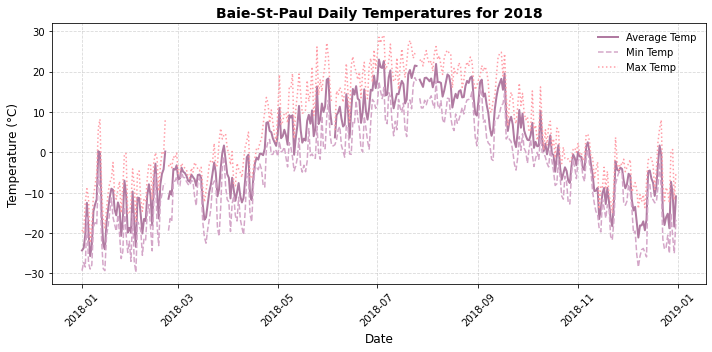

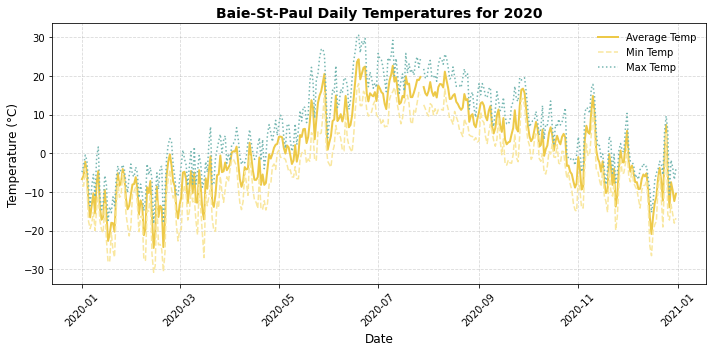

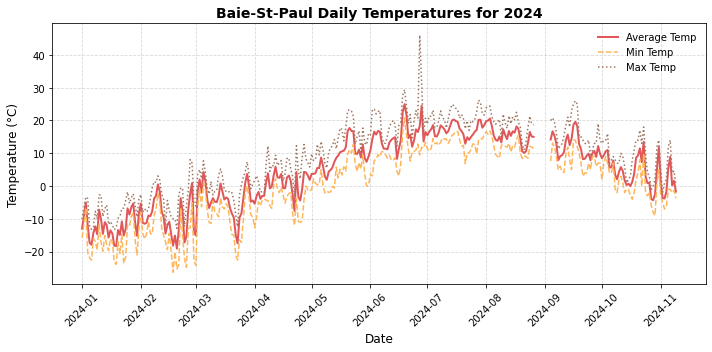

In [60]:
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Daily, Point

# Define the years we want to analyze
years = [2000, 2005, 2018, 2020, 2024]

# Define the location for Baie-St-Paul
baie_st_paul = Point(47.450001, -70.500000)

# Refined color schemes for each year with modern, visually appealing tones
colors = [
    {'avg': '#4e79a7', 'min': '#a0cbe8', 'max': '#f28e2b'},  # 2000: Cool Blue and Warm Orange
    {'avg': '#59a14f', 'min': '#8cd17d', 'max': '#e15759'},  # 2005: Earthy Green and Red
    {'avg': '#b07aa1', 'min': '#d4a6c8', 'max': '#ff9da7'},  # 2018: Soft Purples and Coral
    {'avg': '#edc948', 'min': '#f9e79f', 'max': '#76b7b2'},  # 2020: Yellow and Teal
    {'avg': '#e15759', 'min': '#ffb55a', 'max': '#9c755f'},  # 2024: Soft Red and Brown
]

# Loop over each year and create a separate plot for each
for i, year in enumerate(years):
    # Define start and end dates for the year
    start = datetime(year, 1, 1)
    end = datetime(year, 12, 31)
    
    # Fetch daily data for Baie-St-Paul for the specified year
    data = Daily(baie_st_paul, start, end)
    data = data.fetch()
    
    # Create a new figure for each year
    plt.figure(figsize=(10, 5))
    
    # Plot the data with refined colors for each year
    plt.plot(data.index, data['tavg'], label='Average Temp', color=colors[i]['avg'], linewidth=2)
    plt.plot(data.index, data['tmin'], label='Min Temp', linestyle='--', color=colors[i]['min'], linewidth=1.5)
    plt.plot(data.index, data['tmax'], label='Max Temp', linestyle=':', color=colors[i]['max'], linewidth=1.5)
    
    # Customize the plot with a clean and minimal style
    plt.title(f'Baie-St-Paul Daily Temperatures for {year}', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.legend(loc='upper right', fontsize=10, frameon=False)
    plt.grid(visible=True, linestyle='--', color='gray', alpha=0.3)  # Soft grid lines for subtle background
    
    # Enhance x-axis readability
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    
    # Show the plot for each year
    plt.show()


In [62]:
data_day = Daily(baie_st_paul, start, end)

display(data_day.fetch())

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-01-01,-13.0,-15.8,-10.1,0.0,220.0,360.0,0.0,NaN,1014.5,NaN
2024-01-02,-9.2,-11.8,-6.6,0.0,220.0,297.0,4.7,NaN,1009.5,NaN
2024-01-03,-5.0,-6.6,-3.3,0.3,230.0,236.0,6.1,NaN,1009.3,NaN
2024-01-04,-12.0,-20.3,-3.8,5.9,260.0,267.0,7.2,151.2,1010.0,NaN
2024-01-05,-17.3,-21.9,-12.6,0.2,280.0,273.0,4.1,111.6,1015.5,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-11-05,5.5,-1.0,12.0,4.7,NaN,244.0,9.8,NaN,1012.7,NaN
2024-11-06,8.9,-1.0,14.0,1.1,NaN,264.0,10.8,NaN,1005.1,NaN
2024-11-07,0.2,-2.0,4.0,0.0,NaN,267.0,8.1,NaN,1012.7,NaN


<Figure size 864x432 with 0 Axes>

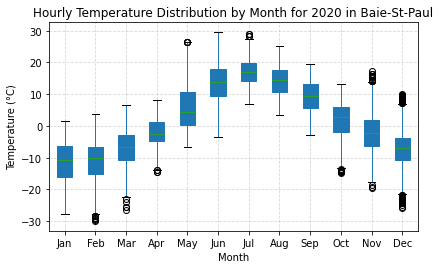

In [63]:
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Hourly, Point
import pandas as pd

# Define the year you want to analyze
year = 2020  # You can change this year as desired

# Define the location for Baie-St-Paul
baie_st_paul = Point(47.450001, -70.500000)

# Define start and end dates for the specified year
start = datetime(year, 1, 1)
end = datetime(year, 12, 31)

# Fetch hourly data for Baie-St-Paul for the specified year
data_hourly = Hourly(baie_st_paul, start, end)
data_hourly = data_hourly.fetch()

# Extract just the temperature column (assuming it's labeled as 'temp')
temp_data = data_hourly['temp'].dropna()  # Drop any NaN values

# Add a 'month' column to group by month
temp_data = temp_data.to_frame()  # Convert series to DataFrame to add columns
temp_data['month'] = temp_data.index.month

# Plot a box plot for each month
plt.figure(figsize=(12, 6))
temp_data.boxplot(column='temp', by='month', grid=False, showfliers=True, patch_artist=True)

# Customize the plot
plt.title(f'Hourly Temperature Distribution by Month for {year} in Baie-St-Paul')
plt.suptitle("")  # Remove the automatic title added by pandas boxplot
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


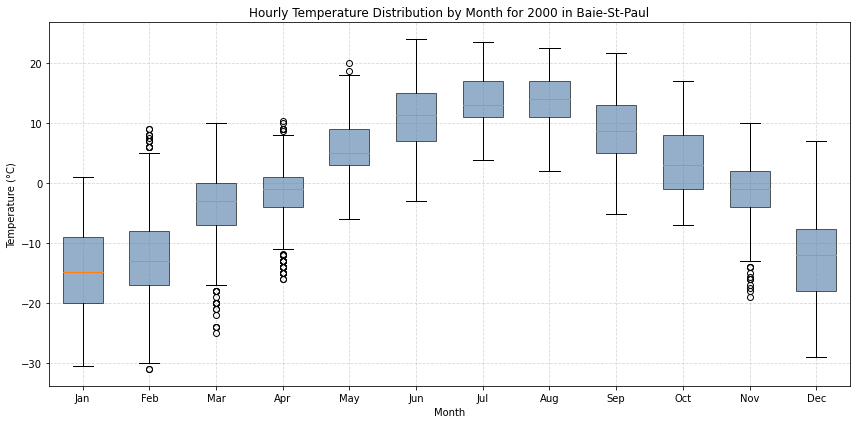

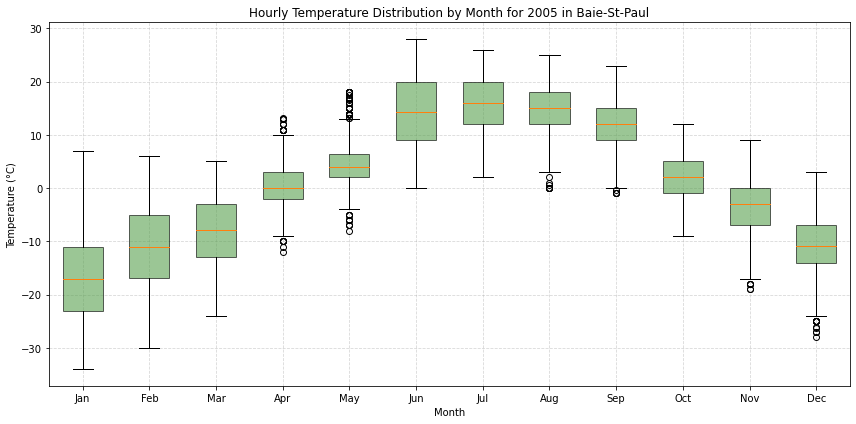

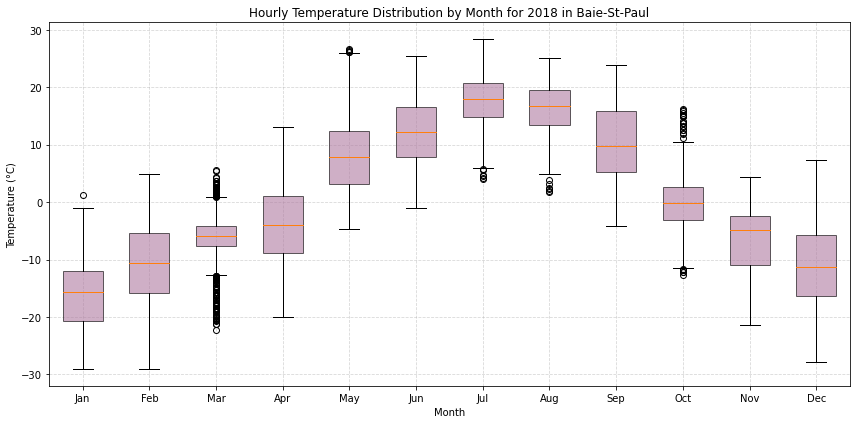

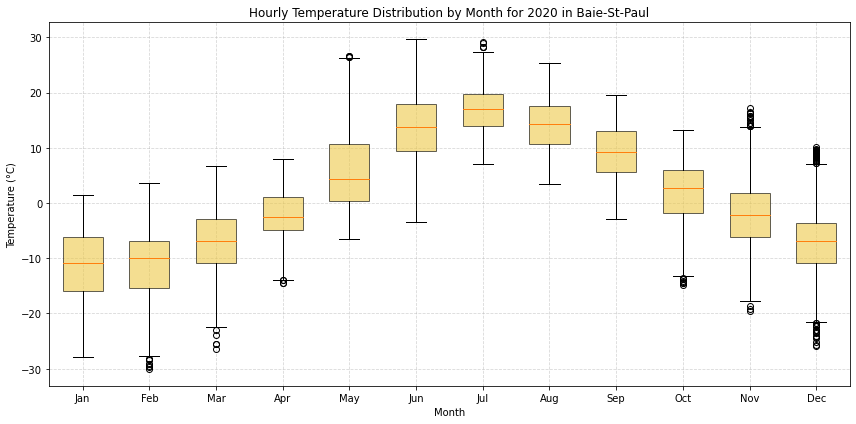

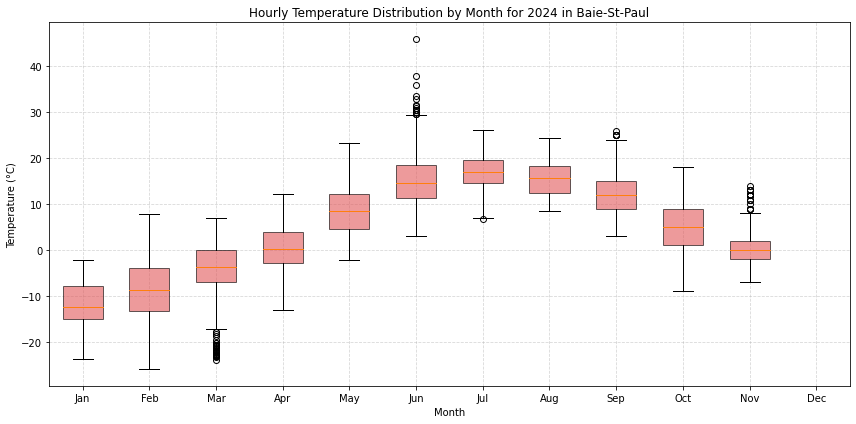

In [68]:
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Hourly, Point
import pandas as pd

# Define the years we want to analyze and their color schemes
years = [2000, 2005, 2018, 2020, 2024]
colors = [
    '#4e79a7',  # Blue for 2000
    '#59a14f',  # Green for 2005
    '#b07aa1',  # Purple for 2018
    '#edc948',  # Yellow for 2020
    '#e15759',  # Red for 2024
]

# Define the location for Baie-St-Paul
baie_st_paul = Point(47.450001, -70.500000)

# Loop over each year and create a monthly box plot for each
for i, year in enumerate(years):
    # Define start and end dates for the year
    start = datetime(year, 1, 1)
    end = datetime(year, 12, 31)
    
    # Fetch hourly data for Baie-St-Paul for the specified year
    data_hourly = Hourly(baie_st_paul, start, end)
    data_hourly = data_hourly.fetch()

    # Extract the 'temp' column and drop any NaN values
    temp_data = data_hourly['temp'].dropna()
    
    # Add a 'month' column to group by month
    temp_data = temp_data.to_frame()  # Convert series to DataFrame to add columns
    temp_data['month'] = temp_data.index.month

    # Group hourly data by month and prepare data for box plot
    monthly_data = [temp_data[temp_data['month'] == month]['temp'] for month in range(1, 13)]

    # Create a custom box plot for each year using Matplotlib
    plt.figure(figsize=(12, 6))
    box = plt.boxplot(monthly_data, patch_artist=True, widths=0.6)

    # Apply consistent color to the box plots for the specific year
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])  # Set the color for each box based on the year
        patch.set_edgecolor('black')    # Set edge color for clarity
        patch.set_alpha(0.6)            # Adjust transparency for visual appeal

    # Customize the plot
    plt.title(f'Hourly Temperature Distribution by Month for {year} in Baie-St-Paul')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, linestyle='--', alpha=0.5)

    # Show the plot for each year
    plt.tight_layout()
    plt.show()


In [74]:
import pandas as pd
from datetime import datetime
from meteostat import Hourly, Point

# Define the location for Baie-St-Paul
baie_st_paul = Point(47.450001, -70.500000)

# Define the start and end dates for the data
start_hour = datetime(1997, 1, 1)
end_hour = datetime(2024, 12, 31)

# Fetch hourly data for Baie-St-Paul from Meteostat
data_hour = Hourly(baie_st_paul, start_hour, end_hour)
data_hour_df = data_hour.fetch()

# Check if data is available
if data_hour_df.empty:
    print("No data available for the specified date range.")
else:
    # Ensure the index is in datetime format
    data_hour_df.index = pd.to_datetime(data_hour_df.index)
    
    # Define the specific day to analyze
    specific_day = "2018-01-01"
    
    # Check if the specific day is in the data
    if specific_day in data_hour_df.index.strftime('%Y-%m-%d'):
        # Filter the data for the specific day
        data_specific_day = data_hour_df.loc[specific_day]
        
        # Calculate the mean and standard deviation for that day
        daily_mean_specific_day = data_specific_day.mean()
        daily_std_specific_day = data_specific_day.std()
        
        # Display the results
        print(f"Daily mean for {specific_day}:\n", daily_mean_specific_day)
        print(f"Daily standard deviation for {specific_day}:\n", daily_std_specific_day)
    else:
        print(f"No data available for {specific_day}.")


Daily mean for 2018-01-01:
 temp     -23.987500
dwpt     -26.495833
rhum      79.791667
prcp            NaN
snow            NaN
wdir     182.173913
wspd      10.569565
wpgt            NaN
pres    1016.382609
tsun            NaN
coco            NaN
dtype: float64
Daily standard deviation for 2018-01-01:
 temp      2.693359
dwpt      2.623883
rhum      2.570386
prcp           NaN
snow           NaN
wdir    142.125314
wspd      6.712433
wpgt           NaN
pres      0.451917
tsun           NaN
coco           NaN
dtype: float64


Comparison Table for January 1, 2018:


,Metric,Hourly Calculated Mean (°C),Daily Extracted Value (°C)
0,Average Temp (tavg),-23.987500,-24.3
1,Min Temp (tmin),-26.495833,-29.3
2,Max Temp (tmax),NaN,-19.2


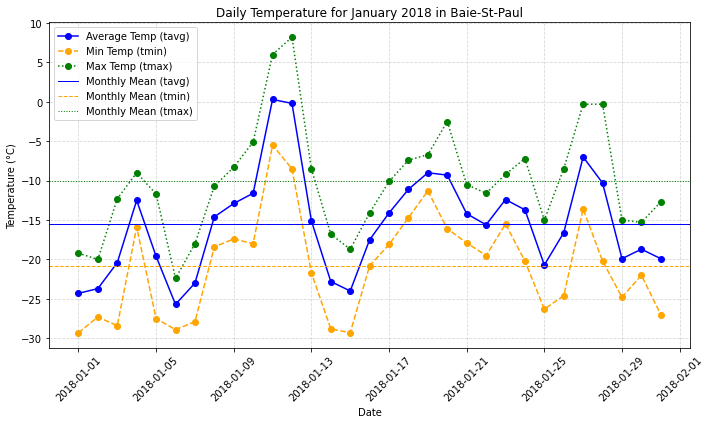

In [86]:
import matplotlib.pyplot as plt
from meteostat import Hourly, Daily, Point
from datetime import datetime
import pandas as pd

# Define the location for Baie-St-Paul
baie_st_paul = Point(47.450001, -70.500000)

# Define specific date for January 1, 2018 (hourly data) and entire month (daily data)
specific_day_start = datetime(2018, 1, 1)
specific_day_end = datetime(2018, 1, 1, 23, 59)  # End of January 1, 2018
month_start = datetime(2018, 1, 1)
month_end = datetime(2018, 1, 31)

# Fetch hourly data for January 1, 2018
data_hour = Hourly(baie_st_paul, specific_day_start, specific_day_end)
data_hour_df = data_hour.fetch()

# Ensure the index is in datetime format
data_hour_df.index = pd.to_datetime(data_hour_df.index)

# Calculate the mean for January 1, 2018, from hourly data
hourly_mean_jan_1 = data_hour_df.mean()

# Fetch daily data for the entire month of January 2018
data_daily = Daily(baie_st_paul, month_start, month_end)
data_daily_df = data_daily.fetch()

# Check if the necessary columns are available
if {'tavg', 'tmin', 'tmax'}.issubset(data_daily_df.columns):
    # Extract the daily values for January 1, 2018, from Daily data
    daily_jan_1 = data_daily_df.loc['2018-01-01']

    # Create a comparison table
    comparison_data = {
        'Metric': ['Average Temp (tavg)', 'Min Temp (tmin)', 'Max Temp (tmax)'],
        'Hourly Calculated Mean (°C)': [
            hourly_mean_jan_1.get('temp', float('nan')),  # Mean temperature for the day
            hourly_mean_jan_1.get('dwpt', float('nan')),  # Mean dew point for the day (if applicable)
            hourly_mean_jan_1.get('tmax', float('nan'))   # Placeholder if more hourly data available
        ],
        'Daily Extracted Value (°C)': [
            daily_jan_1['tavg'],
            daily_jan_1['tmin'],
            daily_jan_1['tmax']
        ]
    }

    comparison_df = pd.DataFrame(comparison_data)

    # Display the comparison table
    print("Comparison Table for January 1, 2018:")
    display(comparison_df)

    # Plot daily tavg, tmin, and tmax values for January 2018
    plt.figure(figsize=(10, 6))
    plt.plot(data_daily_df.index, data_daily_df['tavg'], label='Average Temp (tavg)', color='blue', marker='o')
    plt.plot(data_daily_df.index, data_daily_df['tmin'], label='Min Temp (tmin)', color='orange', marker='o', linestyle='--')
    plt.plot(data_daily_df.index, data_daily_df['tmax'], label='Max Temp (tmax)', color='green', marker='o', linestyle=':')

    # Plot monthly mean as horizontal lines
    monthly_mean = data_daily_df[['tavg', 'tmin', 'tmax']].mean()
    plt.axhline(y=monthly_mean['tavg'], color='blue', linestyle='-', linewidth=1, label='Monthly Mean (tavg)')
    plt.axhline(y=monthly_mean['tmin'], color='orange', linestyle='--', linewidth=1, label='Monthly Mean (tmin)')
    plt.axhline(y=monthly_mean['tmax'], color='green', linestyle=':', linewidth=1, label='Monthly Mean (tmax)')

    # Customize plot
    plt.title('Daily Temperature for January 2018 in Baie-St-Paul')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("The columns 'tavg', 'tmin', or 'tmax' are not available in the data.")


In [78]:
import pandas as pd
from datetime import datetime
from meteostat import Hourly, Point
from scipy.stats import zscore

# Define the location for Baie-St-Paul
baie_st_paul = Point(47.450001, -70.500000)

# Define the start and end dates for May 2020
start = datetime(2020, 5, 1)
end = datetime(2020, 5, 31)

# Fetch hourly data for Baie-St-Paul for May 2020
data_hourly = Hourly(baie_st_paul, start, end)
data_hourly_df = data_hourly.fetch()

# Check if data is available
if data_hourly_df.empty:
    print("No data available for May 2020.")
else:
    # Extract the 'temp' column and drop any NaN values
    may_temp_data = data_hourly_df[['temp']].dropna()  # Convert to DataFrame to add columns

    # Calculate the z-scores and add them as a new column
    may_temp_data['z_score'] = zscore(may_temp_data['temp'])

    # Identify outliers: temperatures with z-score greater than 2 or less than -2
    outliers = may_temp_data[(may_temp_data['z_score'] > 2) | (may_temp_data['z_score'] < -2)]

    # Display only the outliers with their z-scores
    print("Outliers in May 2020 based on z-scores:")
    print(outliers)


Outliers in May 2020 based on z-scores:
                     temp   z_score
time                               
2020-05-21 20:00:00  21.8  2.068384
2020-05-26 15:00:00  21.6  2.041948
2020-05-26 17:00:00  21.3  2.002293
2020-05-26 18:00:00  22.2  2.121257
2020-05-26 19:00:00  23.5  2.293094
2020-05-26 20:00:00  22.9  2.213785
2020-05-27 15:00:00  22.3  2.134475
2020-05-27 16:00:00  24.2  2.385621
2020-05-27 17:00:00  26.1  2.636767
2020-05-27 18:00:00  26.3  2.663204
2020-05-27 19:00:00  26.6  2.702859
2020-05-27 20:00:00  24.7  2.451712
2020-05-27 21:00:00  23.3  2.266658
2020-05-27 22:00:00  23.8  2.332749
2020-05-28 13:00:00  22.6  2.174130
2020-05-28 14:00:00  24.8  2.464931
2020-05-28 15:00:00  26.5  2.689640
2020-05-28 16:00:00  26.4  2.676422
2020-05-28 17:00:00  26.3  2.663204
2020-05-28 18:00:00  24.9  2.478149
2020-05-28 19:00:00  26.6  2.702859
2020-05-28 20:00:00  24.5  2.425276
2020-05-28 21:00:00  24.5  2.425276
2020-05-28 22:00:00  23.2  2.253439
2020-05-28 23:00:00  21.

Comparison Table of Forecasts and Actual Observed Mean:


,Metric,Temperature (°C)
0,Naive Forecast Mean,-15.057143
1,Moving Average Forecast Mean,-14.619429
2,Actual February Mean,-10.618519


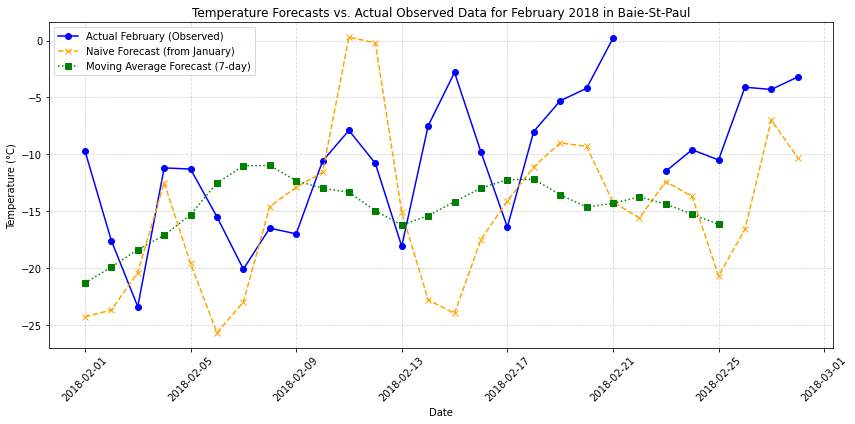

In [88]:
import matplotlib.pyplot as plt
from meteostat import Daily, Point
from datetime import datetime
import pandas as pd

# Define the location for Baie-St-Paul
baie_st_paul = Point(47.450001, -70.500000)

# Define the date ranges for January and February 2018
january_start = datetime(2018, 1, 1)
january_end = datetime(2018, 1, 31)
february_start = datetime(2018, 2, 1)
february_end = datetime(2018, 2, 28)

# Fetch daily data for January and February 2018
data_january = Daily(baie_st_paul, january_start, january_end).fetch()
data_february = Daily(baie_st_paul, february_start, february_end).fetch()

# Check if necessary columns are available
if 'tavg' in data_january.columns and 'tavg' in data_february.columns:
    # Naive Forecast: Repeat January data as forecast for February
    naive_forecast_february = data_january['tavg'].values
    
    # Moving Average Forecast: Calculate a 7-day moving average for January and use it as a forecast
    moving_average_forecast_february = data_january['tavg'].rolling(window=7).mean().dropna().values
    
    # Truncate or extend forecasts to match February's length (28 days)
    naive_forecast_february = naive_forecast_february[:28]
    moving_average_forecast_february = moving_average_forecast_february[:28]

    # Actual observed data for February 2018
    actual_february = data_february['tavg'].values

    # Calculate the mean for each forecast and the actual February mean
    naive_mean = pd.Series(naive_forecast_february).mean()
    moving_avg_mean = pd.Series(moving_average_forecast_february).mean()
    actual_mean = data_february['tavg'].mean()

    # Create a comparison table
    comparison_df = pd.DataFrame({
        'Metric': ['Naive Forecast Mean', 'Moving Average Forecast Mean', 'Actual February Mean'],
        'Temperature (°C)': [naive_mean, moving_avg_mean, actual_mean]
    })

    print("Comparison Table of Forecasts and Actual Observed Mean:")
    display(comparison_df)

    # Plot the forecasts and actual data for February 2018
    plt.figure(figsize=(12, 6))
    plt.plot(data_february.index, actual_february, label='Actual February (Observed)', color='blue', marker='o')
    plt.plot(data_february.index, naive_forecast_february, label='Naive Forecast (from January)', color='orange', linestyle='--', marker='x')
    plt.plot(data_february.index[:len(moving_average_forecast_february)], moving_average_forecast_february, label='Moving Average Forecast (7-day)', color='green', linestyle=':', marker='s')

    # Customize the plot
    plt.title('Temperature Forecasts vs. Actual Observed Data for February 2018 in Baie-St-Paul')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("The 'tavg' column is not available in the data.")
